In [2]:
!pip install pandas numpy matplotlib seaborn statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [3]:
from google.colab import files

print("Upload historical_data.csv")
uploaded = files.upload()

print("Upload fear_greed_index.csv")
uploaded2 = files.upload()



Upload historical_data.csv


Saving historical_data.csv to historical_data (1).csv
Upload fear_greed_index.csv


Saving fear_greed_index.csv to fear_greed_index.csv


In [4]:
historical = pd.read_csv("historical_data.csv")
fg = pd.read_csv("fear_greed_index.csv")


In [6]:
# Convert trade timestamp
historical['trade_time'] = pd.to_datetime(historical['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Extract date only
historical['trade_date'] = historical['trade_time'].dt.date

# Convert mixed date formats
fg['date'] = pd.to_datetime(fg['date'], format='mixed', dayfirst=True, errors='coerce')

# Keep a clean date column
fg['fg_date'] = fg['date'].dt.date

fg.head()


,timestamp,value,classification,date,fg_date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [7]:


# Load your historical dataset
historical = pd.read_csv("/content/historical_data.csv")

# Preview
historical.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
historical['timestamp'] = pd.to_datetime(
    historical['Timestamp IST'],
    format="%d-%m-%Y %H:%M"
)

# Extract date only (for merging later)
historical['trade_date'] = historical['timestamp'].dt.date

historical.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,timestamp,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02


In [9]:
cols_needed = [
    "Account", "Coin", "Execution Price", "Size Tokens", "Size USD",
    "Side", "timestamp", "trade_date", "Closed PnL", "Start Position", "Direction"
]

clean_hist = historical[cols_needed].copy()
clean_hist.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,timestamp,trade_date,Closed PnL,Start Position,Direction
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,2024-12-02,0.0,0.000000,Buy
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,2024-12-02,0.0,986.524596,Buy
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,2024-12-02,0.0,1002.518996,Buy
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,2024-12-02,0.0,1146.558564,Buy
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,2024-12-02,0.0,1289.488521,Buy


In [10]:
merged = clean_hist.merge(
    fg[['fg_date','value','classification']],
    left_on="trade_date",
    right_on="fg_date",
    how="left"
)

merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,timestamp,trade_date,Closed PnL,Start Position,Direction,fg_date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,2024-12-02,0.0,0.000000,Buy,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,2024-12-02,0.0,986.524596,Buy,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,2024-12-02,0.0,1002.518996,Buy,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,2024-12-02,0.0,1146.558564,Buy,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,2024-12-02,0.0,1289.488521,Buy,2024-12-02,80.0,Extreme Greed


In [11]:
import numpy as np

# Ensure Closed PnL is numeric
merged['Closed PnL'] = pd.to_numeric(merged['Closed PnL'], errors='coerce')

# Create a "win" column (1 = profitable, 0 = loss)
merged['win'] = merged['Closed PnL'] > 0

# Group by sentiment classification
sentiment_stats = merged.groupby('classification').agg(
    total_trades = ('Closed PnL', 'count'),
    total_pnl = ('Closed PnL', 'sum'),
    avg_pnl = ('Closed PnL', 'mean'),
    win_rate = ('win', lambda x: np.mean(x) * 100)
).reset_index()

sentiment_stats


,classification,total_trades,total_pnl,avg_pnl,win_rate
0,Extreme Fear,21400,7.391102e+05,34.537862,37.060748
1,Extreme Greed,39992,2.715171e+06,67.892861,46.494299
2,Fear,61837,3.357155e+06,54.290400,42.076750
3,Greed,50303,2.150129e+06,42.743559,38.482794
4,Neutral,37686,1.292921e+06,34.307718,39.699093


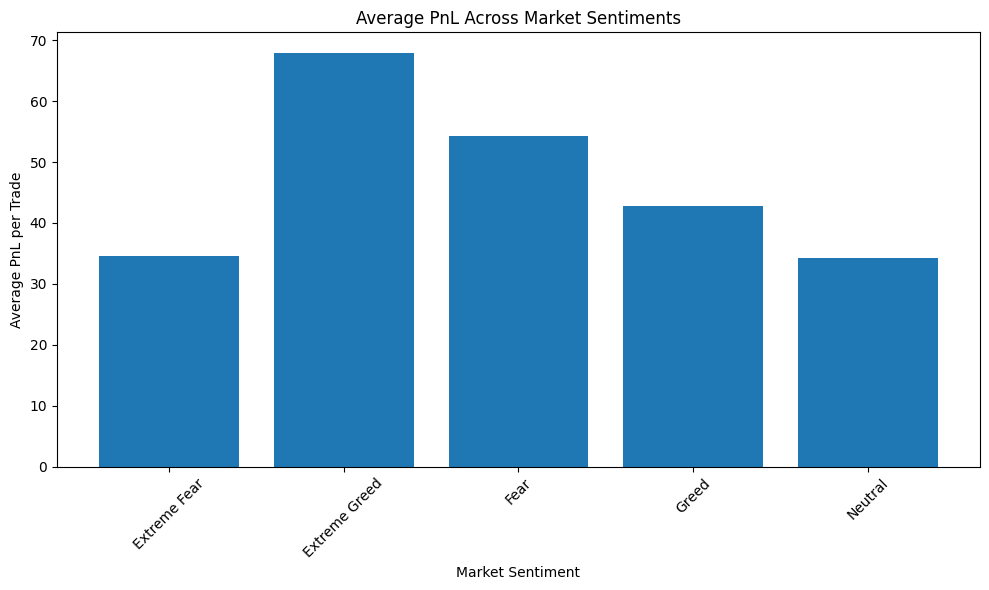

In [12]:
#1. Bar chart: Average PnL vs Market Sentiment
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(sentiment_stats['classification'], sentiment_stats['avg_pnl'])
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL per Trade")
plt.title("Average PnL Across Market Sentiments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


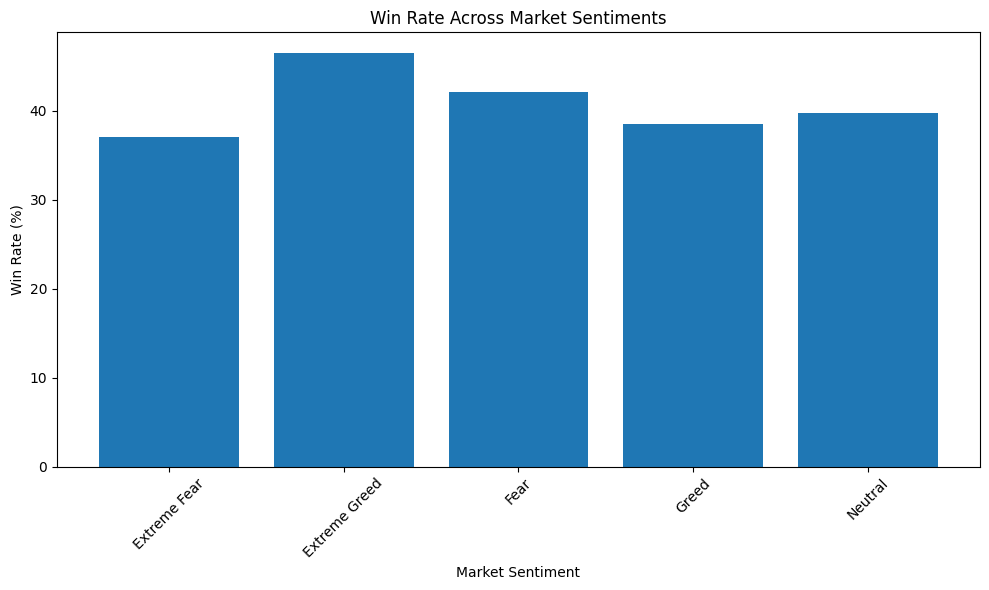

In [13]:
#2. Bar chart: Win Rate vs Market Sentiment
plt.figure(figsize=(10,6))
plt.bar(sentiment_stats['classification'], sentiment_stats['win_rate'])
plt.xlabel("Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.title("Win Rate Across Market Sentiments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


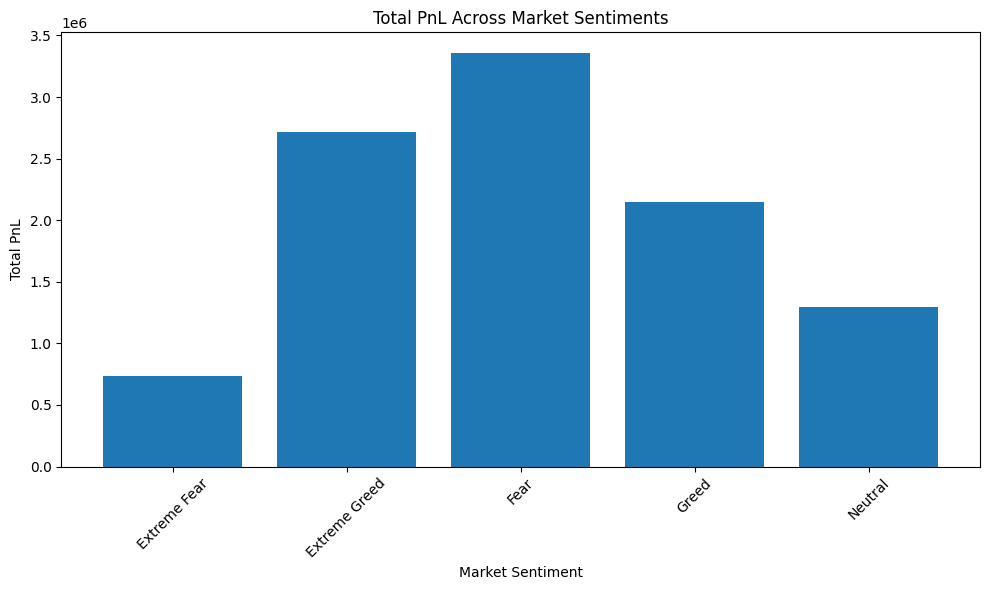

In [14]:
#3. Bar chart: Total PnL vs Sentiment
plt.figure(figsize=(10,6))
plt.bar(sentiment_stats['classification'], sentiment_stats['total_pnl'])
plt.xlabel("Market Sentiment")
plt.ylabel("Total PnL")
plt.title("Total PnL Across Market Sentiments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


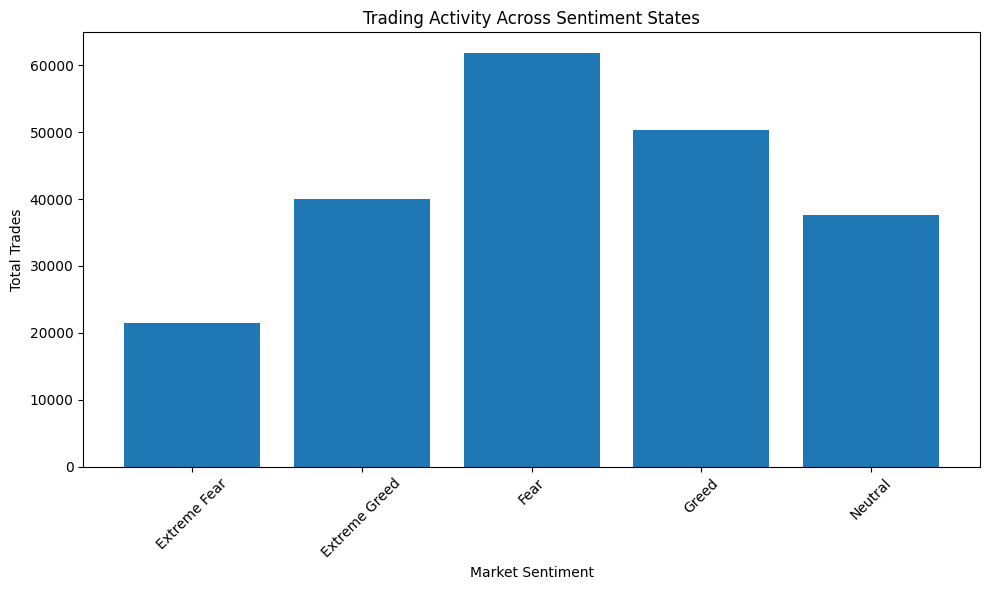

In [15]:
#4. Number of trades per sentiment
plt.figure(figsize=(10,6))
plt.bar(sentiment_stats['classification'], sentiment_stats['total_trades'])
plt.xlabel("Market Sentiment")
plt.ylabel("Total Trades")
plt.title("Trading Activity Across Sentiment States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
#1️⃣ BUY vs SELL trades vary across sentiments
side_sentiment = merged.groupby(['classification', 'Side']).agg(
    trades=('Side', 'count'),
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean')
).reset_index()

side_sentiment


,classification,Side,trades,total_pnl,avg_pnl
0,Extreme Fear,BUY,10935,3.730434e+05,34.114627
1,Extreme Fear,SELL,10465,3.660668e+05,34.980106
2,Extreme Greed,BUY,17940,1.883508e+05,10.498927
3,Extreme Greed,SELL,22052,2.526821e+06,114.584643
4,Fear,BUY,30270,1.935073e+06,63.927104
5,Fear,SELL,31567,1.422082e+06,45.049641
6,Greed,BUY,24576,6.144566e+05,25.002302
7,Greed,SELL,25727,1.535673e+06,59.691091
8,Neutral,BUY,18969,5.544151e+05,29.227429
9,Neutral,SELL,18717,7.385056e+05,39.456408


In [17]:
#2️⃣ Average Position Size (in USD) across sentiments
pos_size = merged.groupby('classification').agg(
    avg_size_usd=('Size USD', 'mean'),
    avg_size_tokens=('Size Tokens', 'mean')
).reset_index()

pos_size


,classification,avg_size_usd,avg_size_tokens
0,Extreme Fear,5349.731843,1675.893319
1,Extreme Greed,3112.251565,8832.415746
2,Fear,7816.109931,2992.641845
3,Greed,5736.884375,4715.327756
4,Neutral,4782.732661,4383.368714


In [18]:
#3️⃣ Win rate of BUY vs SELL across sentiments
buy_sell_winrate = merged.groupby(['classification','Side']).agg(
    win_rate=('win', lambda x: x.mean() * 100)
).reset_index()

buy_sell_winrate


,classification,Side,win_rate
0,Extreme Fear,BUY,20.164609
1,Extreme Fear,SELL,54.715719
2,Extreme Greed,BUY,31.142698
3,Extreme Greed,SELL,58.983312
4,Fear,BUY,26.299967
5,Fear,SELL,57.205309
6,Greed,BUY,31.807454
7,Greed,SELL,44.859486
8,Neutral,BUY,24.002320
9,Neutral,SELL,55.607202


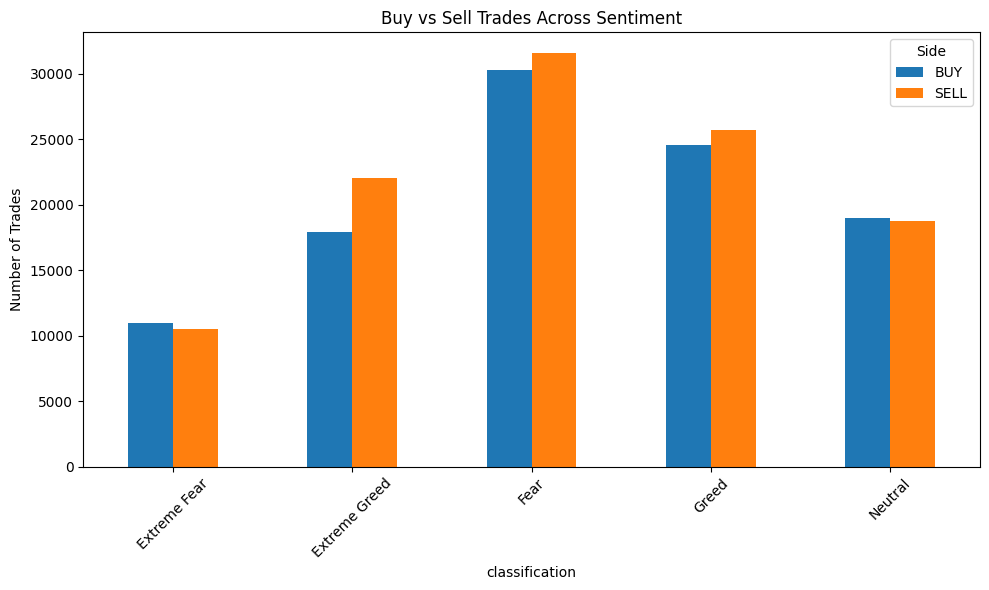

In [19]:
#Bar Chart: Trades by Side per Sentiment
import matplotlib.pyplot as plt

pivot = side_sentiment.pivot(index='classification', columns='Side', values='trades')

pivot.plot(kind='bar', figsize=(10,6))
plt.title("Buy vs Sell Trades Across Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
